In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
repo_url = "https://raw.githubusercontent.com/Alejandra-LozC/dti_alps/main/alps_v3.csv"

try:
    print("Cargando datos desde GitHub...")
    df = pd.read_csv(repo_url, decimal=',', sep=None, engine='python')
    print("¡Carga exitosa!")
    print(df.head())
except Exception as e:
    print(f"Error al cargar el archivo: {e}")

Cargando datos desde GitHub...
¡Carga exitosa!
        id  session    group       tx abstinence  x_proj_L  x_assoc_L  \
0  sub-001        1  control  control    control  0.000432   0.000504   
1  sub-002        1  control  control    control  0.000420   0.000473   
2  sub-004        1  control  control    control  0.000412   0.000485   
3  sub-005        1  control  control    control  0.000435   0.000440   
4  sub-006        1  control  control    control  0.000474   0.000553   

   y_proj_L  z_assoc_L  x_proj_R  x_assoc_R  y_proj_R  z_assoc_R    alps_L  \
0  0.000322   0.000340  0.000427   0.000521  0.000348   0.000359  1.413897   
1  0.000339   0.000313  0.000396   0.000499  0.000316   0.000285  1.369632   
2  0.000381   0.000339  0.000425   0.000477  0.000340   0.000284  1.245833   
3  0.000314   0.000249  0.000431   0.000437  0.000307   0.000275  1.554174   
4  0.000280   0.000417  0.000423   0.000578  0.000352   0.000421  1.473458   

     alps_R      alps  
0  1.340877  1.377387

=== DATA PREPARATION (SESSION 1) ===
Analyzing 11 variables across 5 comparisons...

=== DETAILED STATISTICAL SUMMARY ===
     Variable                     Comparison N (Ctrl/Alc) Mean Ctrl Mean Alc  \
0        alps  1. Control vs Alcohol (Total)        25/40   1.47137  1.38734   
1        alps        2. Control vs Abst <= 6        25/22   1.47137  1.41280   
2        alps        3. Control vs Abst >= 6        25/21   1.47137  1.36545   
3        alps        4. Control vs Abst <= 2        25/10   1.47137  1.44751   
4        alps        5. Control vs Abst >= 2        25/40   1.47137  1.38734   
5      alps_L  1. Control vs Alcohol (Total)        25/40   1.50478  1.40251   
6      alps_L        2. Control vs Abst <= 6        25/22   1.50478  1.42978   
7      alps_L        3. Control vs Abst >= 6        25/21   1.50478  1.38268   
8      alps_L        4. Control vs Abst <= 2        25/10   1.50478  1.46293   
9      alps_L        5. Control vs Abst >= 2        25/40   1.50478  1.40251  

/tmp/ipykernel_40568/3858985990.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_s1, x=col_group, y='alps', palette="Set2", inner="quart")


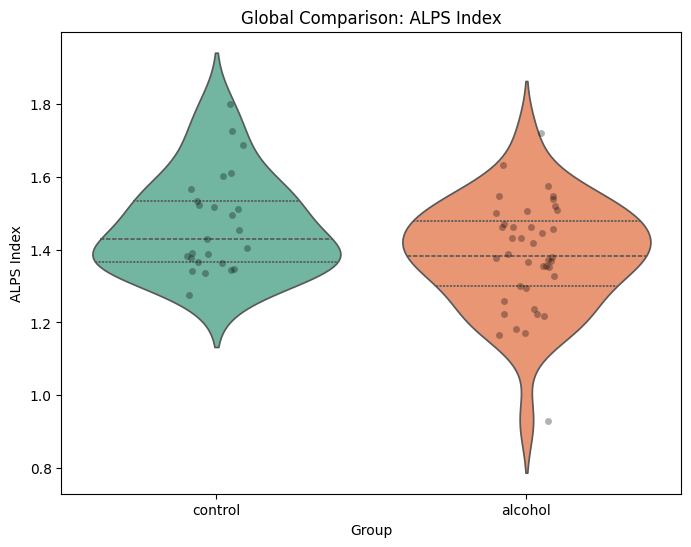


Generating Plot 2: Abstinence Effect (6-month Cutoff)...


/tmp/ipykernel_40568/3858985990.py:176: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot_6, x='plot_group_6', y='alps', order=order_6, palette="coolwarm", inner="quart")


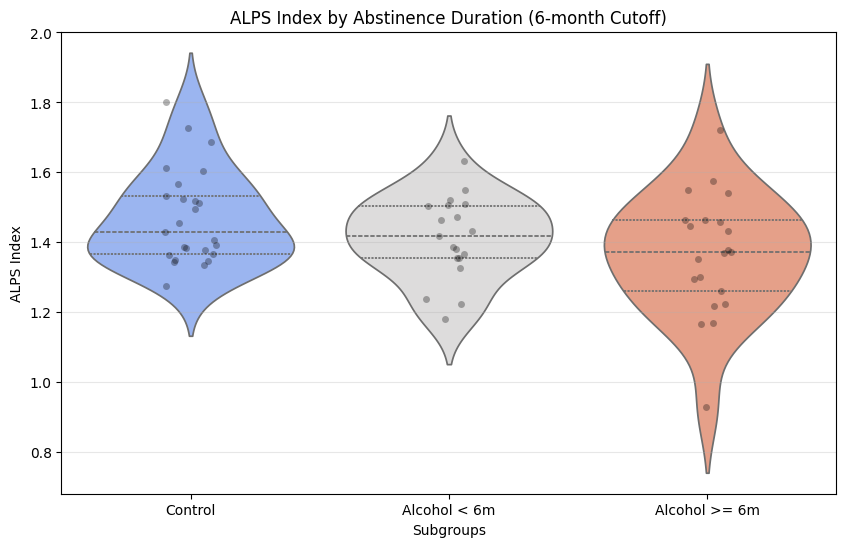


Generating Plot 3: Abstinence Effect (2-month Cutoff)...


/tmp/ipykernel_40568/3858985990.py:199: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot_2, x='plot_group_2', y='alps', order=order_2, palette="viridis", inner="quart")


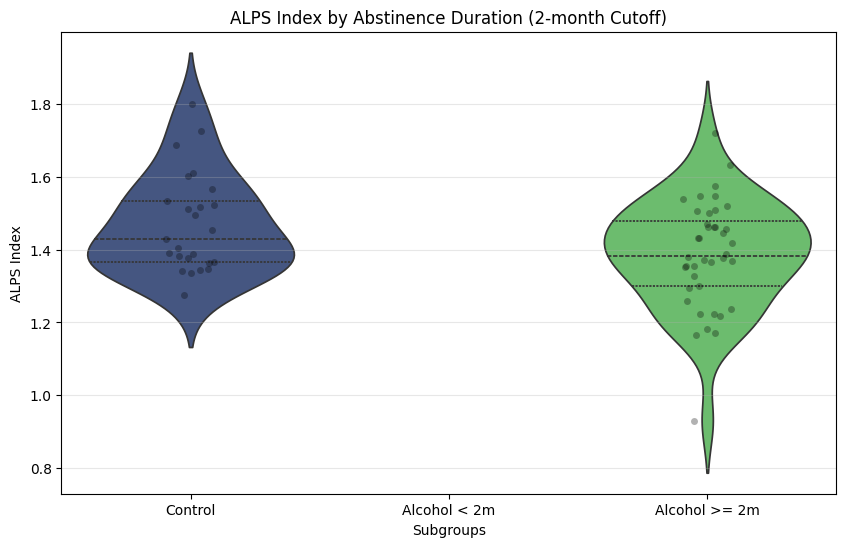

In [3]:
def format_val(val, decimals):
    return f"{val:.{decimals}f}"

# ==========================================
# INITIAL CONFIGURATION
# ==========================================
col_group = 'group'
col_session = 'session'
col_abst = 'abstinence'
col_value = 'alps'

print("=== DATA PREPARATION (SESSION 1) ===")

# Filter for Session 1 only
df_s1 = df[df[col_session] == 1].copy()

# Convert abstinence to numeric (errors='coerce' turns 'control' strings into NaN)
df_s1['abstinence_num'] = pd.to_numeric(df_s1[col_abst], errors='coerce')

# Define masks for main groups
mask_control = df_s1[col_group] == 'control'
mask_alcohol = df_s1[col_group] == 'alcohol'

# ==========================================
# DEFINE SUBGROUPS AND COMPARISONS
# ==========================================
comparisons = [
    {
        "name": "1. Control vs Alcohol (Total)",
        "g1_mask": mask_control,
        "g2_mask": mask_alcohol
    },
    {
        "name": "2. Control vs Abst <= 6",
        "g1_mask": mask_control,
        "g2_mask": (mask_alcohol) & (df_s1['abstinence_num'] <= 6)
    },
    {
        "name": "3. Control vs Abst >= 6",
        "g1_mask": mask_control,
        "g2_mask": (mask_alcohol) & (df_s1['abstinence_num'] >= 6)
    },
    {
        "name": "4. Control vs Abst <= 2",
        "g1_mask": mask_control,
        "g2_mask": (mask_alcohol) & (df_s1['abstinence_num'] <= 2)
    },
    {
        "name": "5. Control vs Abst >= 2",
        "g1_mask": mask_control,
        "g2_mask": (mask_alcohol) & (df_s1['abstinence_num'] >= 2)
    }
]

# Variables to analyze
variables = ['alps', 'alps_L', 'alps_R']
# If you want to include raw DTI metrics, add them here:
variables += ['x_proj_L', 'x_assoc_L', 'y_proj_L', 'z_assoc_L', 'x_proj_R', 'x_assoc_R', 'y_proj_R', 'z_assoc_R']

# ==========================================
# STATISTICAL ANALYSIS LOOP
# ==========================================
results = []

print(f"Analyzing {len(variables)} variables across {len(comparisons)} comparisons...")

# Ensure the variables we will analyze are numeric (coerce unparseable values to NaN)
for v in variables:
    df_s1[v] = pd.to_numeric(df_s1[v], errors='coerce')

for var in variables:
    for comp in comparisons:
        # A) Extract Data (now numeric)
        data_c = df_s1.loc[comp['g1_mask'], var].dropna().astype(float)   # Control Group (Reference)
        data_alc = df_s1.loc[comp['g2_mask'], var].dropna().astype(float) # Experimental Group

        # Validate N (Sample size)
        n_c, n_alc = len(data_c), len(data_alc)
        if n_c < 2 or n_alc < 2:
            continue  # Skip if not enough data points

        # B) Mann-Whitney U (Non-parametric - Robust)
        # SciPy may raise errors if inputs are not numeric; ensure they're float arrays
        u_stat, p_u = stats.mannwhitneyu(data_c.values, data_alc.values)

        # C) T-Test (Welch's - as requested in secondary script)
        t_stat, p_t = stats.ttest_ind(data_c.values, data_alc.values, equal_var=False)

        # D) Cohen's d (Effect Size)
        mean_c, mean_alc = data_c.mean(), data_alc.mean()
        sd_c, sd_alc = data_c.std(ddof=1), data_alc.std(ddof=1)

        # Pooled SD Calculation
        # Ensure we don't divide by zero if one group has N=1 (std undefined or 0)
        if (n_c + n_alc - 2) > 0 and (n_c > 1 and n_alc > 1):
            sd_pooled = np.sqrt(((n_c - 1) * sd_c**2 + (n_alc - 1) * sd_alc**2) / (n_c + n_alc - 2))
        else:
            # If pooled SD can't be calculated meaningfully, default to NaN
            sd_pooled = np.nan

        # Avoid division by zero
        if pd.isna(sd_pooled) or sd_pooled == 0:
            cohen_d = 0.0
        else:
            cohen_d = (mean_c - mean_alc) / sd_pooled

        def get_sig_stars(p):
            if p < 0.001: return '***'
            elif p < 0.01: return '**'
            elif p < 0.05: return '*'
            else: return ''

        p_min = min(p_u, p_t)
        sig_label = get_sig_stars(p_min)

        results.append({
            'Variable': var,
            'Comparison': comp['name'],
            'N (Ctrl/Alc)': f"{n_c}/{n_alc}",
            'Mean Ctrl': format_val(mean_c, 5),
            'Mean Alc': format_val(mean_alc, 5),
            'P-Val (M-W)': format_val(p_u, 5),
            'P-Val (T-T)': format_val(p_t, 5),
            'Cohen\'s d': round(cohen_d, 4),
            'Sig?': sig_label
        })

# ==========================================
# DISPLAY RESULTS TABLE
# ==========================================
res_df = pd.DataFrame(results)
print("\n=== DETAILED STATISTICAL SUMMARY ===")

try:
    from tabulate import tabulate
    # Print table per variable for readability
    for var in variables:
        print(f"\n--- Results for: {var} ---")
        subset = res_df[res_df['Variable'] == var].drop(columns=['Variable'])
        print(tabulate(subset, headers='keys', tablefmt='github', showindex=False))
except ImportError:
    print(res_df)

# ==========================================
# VISUALIZATION
# ==========================================

# --- Plot A: Classic Control vs Alcohol (Global) ---
print("\nGenerating Plot 1: Control vs Alcohol (Global)...")
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_s1, x=col_group, y='alps', palette="Set2", inner="quart")
sns.stripplot(data=df_s1, x=col_group, y='alps', color='black', alpha=0.3)
plt.title('Global Comparison: ALPS Index')
plt.xlabel('Group')
plt.ylabel('ALPS Index')
plt.show()

# --- Plot B: Abstinence Breakdown (6-month Cutoff) ---
# Create temporary category column for plotting
conditions = [
    (df_s1[col_group] == 'control'),
    (df_s1[col_group] == 'alcohol') & (df_s1['abstinence_num'] < 6),
    (df_s1[col_group] == 'alcohol') & (df_s1['abstinence_num'] >= 6)
]
choices = ['Control', 'Alcohol < 6m', 'Alcohol >= 6m']
df_s1['plot_group_6'] = np.select(conditions, choices, default=None) # Changed default=np.nan to default=None

# Filter NaNs (cases that don't fit clean categories)
df_plot_6 = df_s1.dropna(subset=['plot_group_6'])

print("\nGenerating Plot 2: Abstinence Effect (6-month Cutoff)...")
plt.figure(figsize=(10, 6))
# Specific order to visualize progression
order_6 = ['Control', 'Alcohol < 6m', 'Alcohol >= 6m']

sns.violinplot(data=df_plot_6, x='plot_group_6', y='alps', order=order_6, palette="coolwarm", inner="quart")
sns.stripplot(data=df_plot_6, x='plot_group_6', y='alps', order=order_6, color='black', alpha=0.3)

plt.title('ALPS Index by Abstinence Duration (6-month Cutoff)')
plt.ylabel('ALPS Index')
plt.xlabel('Subgroups')
plt.grid(axis='y', alpha=0.3)
plt.show()

# --- Plot C: Abstinence Breakdown (2-month Cutoff) ---
conditions_2 = [
    (df_s1[col_group] == 'control'),
    (df_s1[col_group] == 'alcohol') & (df_s1['abstinence_num'] < 2),
    (df_s1[col_group] == 'alcohol') & (df_s1['abstinence_num'] >= 2)
]
choices_2 = ['Control', 'Alcohol < 2m', 'Alcohol >= 2m']
df_s1['plot_group_2'] = np.select(conditions_2, choices_2, default=None) # Changed default=np.nan to default=None
df_plot_2 = df_s1.dropna(subset=['plot_group_2'])

print("\nGenerating Plot 3: Abstinence Effect (2-month Cutoff)...")
plt.figure(figsize=(10, 6))
order_2 = ['Control', 'Alcohol < 2m', 'Alcohol >= 2m']

sns.violinplot(data=df_plot_2, x='plot_group_2', y='alps', order=order_2, palette="viridis", inner="quart")
sns.stripplot(data=df_plot_2, x='plot_group_2', y='alps', order=order_2, color='black', alpha=0.3)

plt.title('ALPS Index by Abstinence Duration (2-month Cutoff)')
plt.ylabel('ALPS Index')
plt.xlabel('Subgroups')
plt.grid(axis='y', alpha=0.3)
plt.show()

=== PREPARING DATA FOR ANCOVA MODEL ===
ANCOVA dataset prepared:
- Total subjects with both sessions: 42
- Control group: 10
- Alcohol group: 32
- Columns: ['id', 'group', 'Sesion1', 'Sesion2']

First 5 rows of ANCOVA dataset:
       id  group   Sesion1   Sesion2
0  sub-03      0  1.390981  1.390000
1  sub-06      0  1.567034  1.511377
2  sub-09      0  1.533166  1.516999
3  sub-10      0  1.274884  1.489254
4  sub-11      0  1.726452  1.648331

=== RUNNING ANCOVA MODEL ===

ANCOVA Results:
                            OLS Regression Results                            
Dep. Variable:                Sesion2   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     39.46
Date:                Wed, 14 Jan 2026   Prob (F-statistic):           4.26e-10
Time:                        13:35:25   Log-Likelihood:                 44.562
No. Observations:             

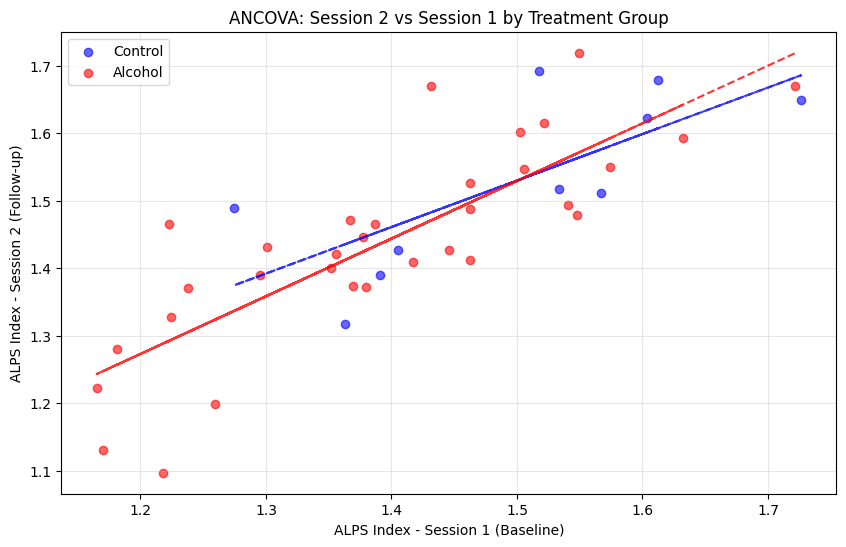

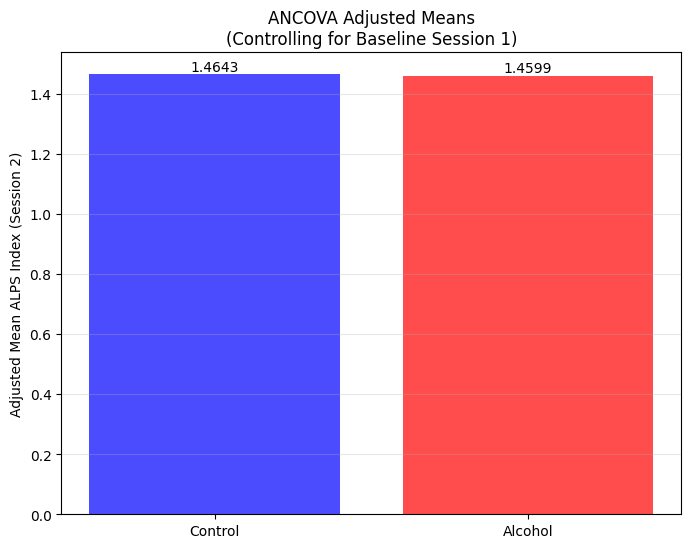


ANCOVA analysis completed!


In [8]:
# ==========================================
# ANCOVA MODEL PREPARATION AND ANALYSIS
# ==========================================

print("=== PREPARING DATA FOR ANCOVA MODEL ===")

# Step 1: Prepare the data for ANCOVA
# We need Session 1 and Session 2 data for the same subjects
df_session1 = df[df['session'] == 1][['id', 'group', 'alps']].copy()
df_session2 = df[df['session'] == 2][['id', 'group', 'alps']].copy()

# Rename columns for clarity
df_session1 = df_session1.rename(columns={'alps': 'Sesion1'})
df_session2 = df_session2.rename(columns={'alps': 'Sesion2'})

# Merge sessions to get paired data
df_ancova = pd.merge(df_session1, df_session2, on=['id', 'group'], how='inner')

# Create treatment variable (group) - assuming 'alcohol' is treatment, 'control' is control
df_ancova['group'] = df_ancova['group'].map({'control': 0, 'alcohol': 1})

# Remove any rows with missing values
df_ancova = df_ancova.dropna(subset=['Sesion1', 'Sesion2', 'group'])

print(f"ANCOVA dataset prepared:")
print(f"- Total subjects with both sessions: {len(df_ancova)}")
print(f"- Control group: {len(df_ancova[df_ancova['group'] == 0])}")
print(f"- Alcohol group: {len(df_ancova[df_ancova['group'] == 1])}")
print(f"- Columns: {list(df_ancova.columns)}")

# Display first few rows
print("\nFirst 5 rows of ANCOVA dataset:")
print(df_ancova.head())

# ==========================================
# RUN ANCOVA MODEL
# ==========================================

print("\n=== RUNNING ANCOVA MODEL ===")

# Fit the ANCOVA model
model = smf.ols('Sesion2 ~ C(group) + Sesion1', data=df_ancova).fit()

# Display results
print("\nANCOVA Results:")
print("=" * 60)
print(model.summary())

# ==========================================
# EXTRACT KEY STATISTICS
# ==========================================

print("\n=== KEY STATISTICS SUMMARY ===")

# Extract key values
treatment_effect = model.params['C(group)[T.1]']
treatment_pvalue = model.pvalues['C(group)[T.1]']
covariate_effect = model.params['Sesion1']
covariate_pvalue = model.pvalues['Sesion1']
r_squared = model.rsquared
adj_r_squared = model.rsquared_adj

print(f"Treatment Effect (Alcohol vs Control): {treatment_effect:.4f}")
print(f"Treatment P-value: {treatment_pvalue:.4f}")
print(f"Baseline Covariate Effect: {covariate_effect:.4f}")
print(f"Baseline P-value: {covariate_pvalue:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"Adjusted R-squared: {adj_r_squared:.4f}")

# Significance interpretation
def get_significance(p_value):
    if p_value < 0.001:
        return "*** (p < 0.001)"
    elif p_value < 0.01:
        return "** (p < 0.01)"
    elif p_value < 0.05:
        return "* (p < 0.05)"
    else:
        return "ns (not significant)"

print(f"\nTreatment Effect Significance: {get_significance(treatment_pvalue)}")
print(f"Baseline Covariate Significance: {get_significance(covariate_pvalue)}")

# ==========================================
# VISUALIZATIONS
# ==========================================

print("\n=== GENERATING VISUALIZATIONS ===")

# Plot 1: Scatter plot with regression lines
plt.figure(figsize=(10, 6))
colors = ['blue', 'red']
groups = [0, 1]
group_names = ['Control', 'Alcohol']

for i, group in enumerate(groups):
    group_data = df_ancova[df_ancova['group'] == group]
    plt.scatter(group_data['Sesion1'], group_data['Sesion2'], 
            color=colors[i], alpha=0.6, label=group_names[i])
    
    # Add regression line for each group
    z = np.polyfit(group_data['Sesion1'], group_data['Sesion2'], 1)
    p = np.poly1d(z)
    plt.plot(group_data['Sesion1'], p(group_data['Sesion1']), 
            color=colors[i], linestyle='--', alpha=0.8)

plt.xlabel('ALPS Index - Session 1 (Baseline)')
plt.ylabel('ALPS Index - Session 2 (Follow-up)')
plt.title('ANCOVA: Session 2 vs Session 1 by Treatment Group')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot 2: Adjusted means (controlling for baseline)
plt.figure(figsize=(8, 6))

# Calculate adjusted means
baseline_mean = df_ancova['Sesion1'].mean()
intercept = model.params['Intercept']
treatment_effect = model.params['C(group)[T.1]']
covariate_effect = model.params['Sesion1']

adj_mean_control = intercept + covariate_effect * baseline_mean
adj_mean_alcohol = intercept + treatment_effect + covariate_effect * baseline_mean

groups = ['Control', 'Alcohol']
adj_means = [adj_mean_control, adj_mean_alcohol]

plt.bar(groups, adj_means, color=['blue', 'red'], alpha=0.7)
plt.ylabel('Adjusted Mean ALPS Index (Session 2)')
plt.title('ANCOVA Adjusted Means\n(Controlling for Baseline Session 1)')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, mean in enumerate(adj_means):
    plt.text(i, mean + 0.001, f'{mean:.4f}', ha='center', va='bottom')

plt.show()

print("\nANCOVA analysis completed!")

In [9]:
df_ancova

,id,group,Sesion1,Sesion2
0,sub-03,0,1.390981,1.390000
1,sub-06,0,1.567034,1.511377
2,sub-09,0,1.533166,1.516999
3,sub-10,0,1.274884,1.489254
4,sub-11,0,1.726452,1.648331
5,sub-12,0,1.517179,1.692361
6,sub-13,0,1.612513,1.678707
7,sub-15,0,1.603504,1.622993
8,sub-16,1,1.721243,1.669185
9,sub-17,1,1.238230,1.370487



=== PREPARANDO DATOS PARA EL MODELO ANCOVA ===
Sujetos con datos completos: 32
- Grupo Active: 17
- Grupo Sham: 15

=== CORRIENDO MODELO ANCOVA ===
                            OLS Regression Results                            
Dep. Variable:                Sesion2   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     29.85
Date:                Wed, 14 Jan 2026   Prob (F-statistic):           9.13e-08
Time:                        13:27:51   Log-Likelihood:                 34.089
No. Observations:                  32   AIC:                            -62.18
Df Residuals:                      29   BIC:                            -57.78
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t| 

/tmp/ipykernel_40568/405511245.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Active', 'Sham'], y=[adj_active, adj_sham], palette=['blue', 'red'], ax=ax2)


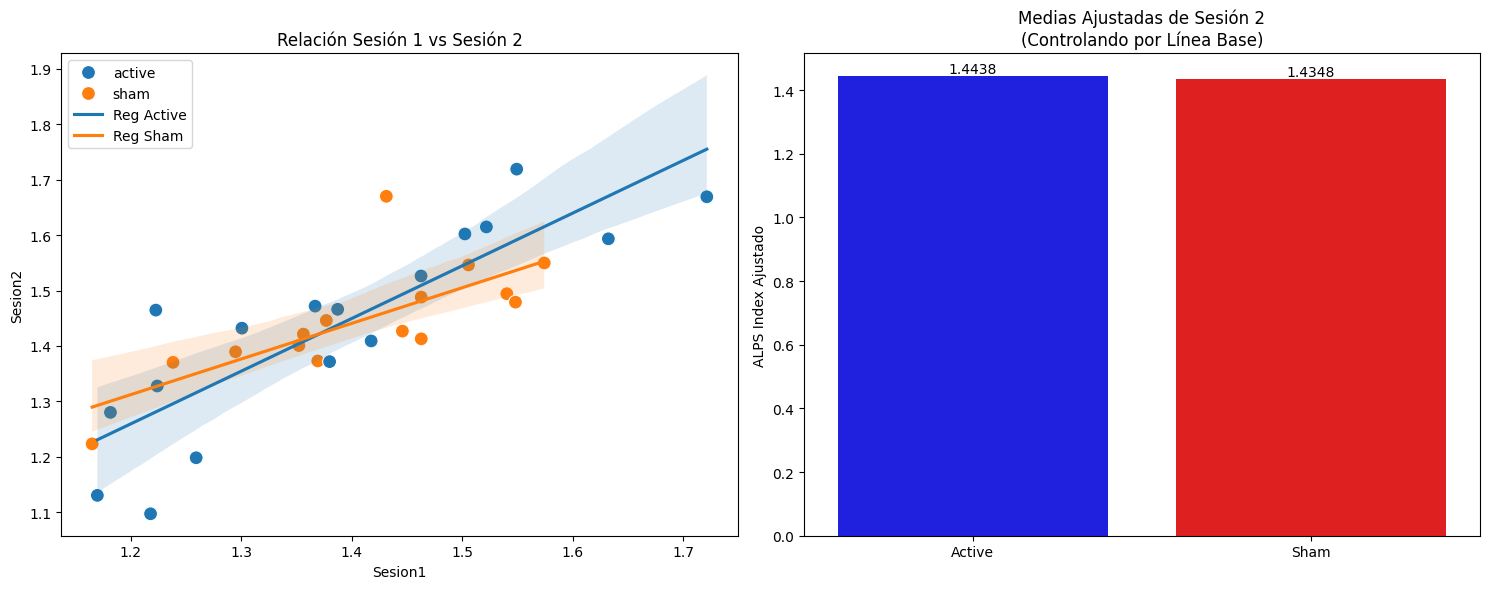


Análisis completado exitosamente.


In [6]:
print("\n=== PREPARANDO DATOS PARA EL MODELO ANCOVA ===")

# Separamos sesiones (buscando que contenga '1' o '2')
# Evitamos usar .str (genera error si la columna no es string).
# Usamos comparación numérica porque 'session' en el dataframe es int.
df_session1 = df[df['session'] == 1][['id', 'tx', 'alps']].copy()
df_session2 = df[df['session'] == 2][['id', 'tx', 'alps']].copy()

# Renombramos
df_session1 = df_session1.rename(columns={'alps': 'Sesion1'})
df_session2 = df_session2.rename(columns={'alps': 'Sesion2'})

# MERGE: Solo sujetos que tengan AMBAS sesiones
# Nota: No incluimos 'tx' en el merge por si acaso hay inconsistencias de nombre entre sesiones
df_ancova = pd.merge(df_session1[['id', 'Sesion1']], 
                    df_session2[['id', 'Sesion2', 'tx']], 
                    on='id', how='inner')

# Mapeo de tratamiento (Asegúrate de que coincida con tus grupos: active/sham)
# Si tus grupos se llaman distinto, cámbialos aquí:
mapping = {'active': 0, 'sham': 1}
df_ancova['tx_num'] = df_ancova['tx'].map(mapping)

# Limpieza de NaNs post-merge
df_ancova = df_ancova.dropna(subset=['Sesion1', 'Sesion2', 'tx_num'])

print(f"Sujetos con datos completos: {len(df_ancova)}")
if len(df_ancova) == 0:
    print("ALERTA: Siguen saliendo 0 sujetos. Revisa si los IDs de Sesión 1 coinciden con Sesión 2.")
else:
    print(f"- Grupo Active: {len(df_ancova[df_ancova['tx_num'] == 0])}")
    print(f"- Grupo Sham: {len(df_ancova[df_ancova['tx_num'] == 1])}")

# ==========================================
# 4. EJECUCIÓN DEL MODELO ANCOVA
# ==========================================
if len(df_ancova) > 0:
    print("\n=== CORRIENDO MODELO ANCOVA ===")
    
    # tx_num se trata como categoría. Sesion1 es la covariable.
    model = smf.ols('Sesion2 ~ C(tx_num) + Sesion1', data=df_ancova).fit()
    print(model.summary())

    # ==========================================
    # 5. EXTRACCIÓN DINÁMICA DE ESTADÍSTICOS
    # ==========================================
    param_names = list(model.params.index)
    treat_param = next((n for n in param_names if 'tx_num' in n and 'T.1' in n), None)
    cov_param = 'Sesion1'

    if treat_param and cov_param:
        t_eff = model.params[treat_param]
        t_pval = model.pvalues[treat_param]
        
        print("\n=== RESUMEN DE RESULTADOS CLAVE ===")
        print(f"Efecto del Tratamiento (Sham vs Active): {t_eff:.4f}")
        print(f"Valor p Tratamiento: {t_pval:.4f}")
        print(f"R-squared: {model.rsquared:.4f}")

    # ==========================================
    # 6. VISUALIZACIONES
    # ==========================================
    print("\n=== GENERANDO VISUALIZACIONES ===")
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Gráfico 1: Scatter con Líneas de Regresión
    sns.scatterplot(data=df_ancova, x='Sesion1', y='Sesion2', hue='tx', ax=ax1, s=100)
    sns.regplot(data=df_ancova[df_ancova['tx_num']==0], x='Sesion1', y='Sesion2', ax=ax1, scatter=False, label='Reg Active')
    sns.regplot(data=df_ancova[df_ancova['tx_num']==1], x='Sesion1', y='Sesion2', ax=ax1, scatter=False, label='Reg Sham')
    ax1.set_title('Relación Sesión 1 vs Sesión 2')
    ax1.legend()

    # Gráfico 2: Medias Ajustadas
    # Calculamos medias ajustadas manualmente usando el intercepto y la media de la covariable
    baseline_mean = df_ancova['Sesion1'].mean()
    adj_active = model.params['Intercept'] + (model.params['Sesion1'] * baseline_mean)
    adj_sham = adj_active + model.params[treat_param]

    sns.barplot(x=['Active', 'Sham'], y=[adj_active, adj_sham], palette=['blue', 'red'], ax=ax2)
    ax2.set_title('Medias Ajustadas de Sesión 2\n(Controlando por Línea Base)')
    ax2.set_ylabel('ALPS Index Ajustado')
    
    # Añadir valores sobre las barras
    for i, v in enumerate([adj_active, adj_sham]):
        ax2.text(i, v, f'{v:.4f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    print("\nAnálisis completado exitosamente.")

=== PREPARING DATA FOR ANCOVA MODEL ===
ANCOVA dataset prepared:
- Total subjects with both sessions: 32
- Control group: 17
- Alcohol group: 15
- Columns: ['id', 'tx', 'Sesion1', 'Sesion2']

First 5 rows of ANCOVA dataset:
        id   tx   Sesion1   Sesion2
8   sub-16  0.0  1.721243  1.669185
9   sub-17  1.0  1.238230  1.370487
10  sub-18  1.0  1.445788  1.426816
11  sub-19  1.0  1.165073  1.223405
12  sub-20  0.0  1.300592  1.432190

=== RUNNING ANCOVA MODEL ===

ANCOVA Results:
                            OLS Regression Results                            
Dep. Variable:                Sesion2   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     29.85
Date:                Wed, 14 Jan 2026   Prob (F-statistic):           9.13e-08
Time:                        13:09:27   Log-Likelihood:                 34.089
No. Observations:                  32  

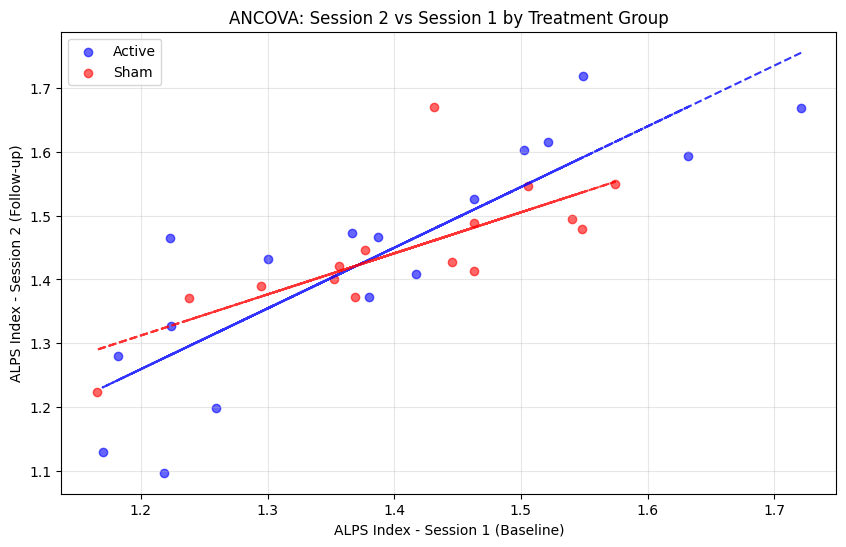

KeyError: 'C(tx)[T.1]'

<Figure size 800x600 with 0 Axes>

In [ ]:
# ==========================================
# ANCOVA MODEL PREPARATION AND ANALYSIS
# ==========================================

print("=== PREPARING DATA FOR ANCOVA MODEL ===")

# Step 1: Prepare the data for ANCOVA
# We need Session 1 and Session 2 data for the same subjects
df_session1 = df[df['session'] == 1][['id', 'tx', 'alps']].copy()
df_session2 = df[df['session'] == 2][['id', 'tx', 'alps']].copy()

# Rename columns for clarity
df_session1 = df_session1.rename(columns={'alps': 'Sesion1'})
df_session2 = df_session2.rename(columns={'alps': 'Sesion2'})

# Merge sessions to get paired data
df_ancova = pd.merge(df_session1, df_session2, on=['id', 'tx'], how='inner')

# Create treatment variable (tx) - assuming 'alcohol' is treatment, 'control' is control
df_ancova['tx'] = df_ancova['tx'].map({'active': 0, 'sham': 1})

# Remove any rows with missing values
df_ancova = df_ancova.dropna(subset=['Sesion1', 'Sesion2', 'tx'])

print(f"ANCOVA dataset prepared:")
print(f"- Total subjects with both sessions: {len(df_ancova)}")
print(f"- Active group: {len(df_ancova[df_ancova['tx'] == 0])}")
print(f"- Sham group: {len(df_ancova[df_ancova['tx'] == 1])}")
print(f"- Columns: {list(df_ancova.columns)}")

# Display first few rows
print("\nFirst 5 rows of ANCOVA dataset:")
print(df_ancova.head())

# ==========================================
# RUN ANCOVA MODEL
# ==========================================

print("\n=== RUNNING ANCOVA MODEL ===")

# Fit the ANCOVA model
model = smf.ols('Sesion2 ~ C(tx) + Sesion1', data=df_ancova).fit()

# Display results
print("\nANCOVA Results:")
print("=" * 60)
print(model.summary())

# ==========================================
# EXTRACT KEY STATISTICS
# ==========================================

print("\n=== KEY STATISTICS SUMMARY ===")

# Robustly locate the treatment parameter name in the fitted model parameters.
# Different encodings may produce names like:
#   - "C(tx)[T.1]"
#   - "C(tx)[T.sham]" (if tx kept as strings)
#   - "tx" (if tx treated as numeric)
# So we search the model parameter names instead of assuming a fixed label.
import re

param_names = list(model.params.index)

# Try common patterns
treat_param = None
# 1) exact categorical coding like C(tx)[T.something]
for name in param_names:
    if re.match(r"^C\(tx\)\[T\..+\]$", str(name)):
        treat_param = name
        break
# 2) a plain 'tx' numeric slope
if treat_param is None and 'tx' in param_names:
    treat_param = 'tx'
# 3) any parameter that contains 'tx' as a substring
if treat_param is None:
    for name in param_names:
        if 'tx' in str(name):
            treat_param = name
            break

if treat_param is None:
    raise KeyError(f"Treatment parameter for 'tx' not found in model.params. Available params: {param_names}")

# Locate covariate parameter (Sesion1)
cov_param = None
if 'Sesion1' in param_names:
    cov_param = 'Sesion1'
else:
    for name in param_names:
        if 'Sesion1' in str(name):
            cov_param = name
            break
if cov_param is None:
    raise KeyError(f"Covariate parameter 'Sesion1' not found in model.params. Available params: {param_names}")

# Extract key values using discovered parameter names
treatment_effect = model.params[treat_param]
treatment_pvalue = model.pvalues[treat_param]
covariate_effect = model.params[cov_param]
covariate_pvalue = model.pvalues[cov_param]
r_squared = model.rsquared
adj_r_squared = model.rsquared_adj

print(f"Detected treatment parameter: {treat_param}")
print(f"Treatment Effect (Alcohol vs Sham): {treatment_effect:.4f}")
print(f"Treatment P-value: {treatment_pvalue:.4f}")
print(f"Detected covariate parameter: {cov_param}")
print(f"Baseline Covariate Effect: {covariate_effect:.4f}")
print(f"Baseline P-value: {covariate_pvalue:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"Adjusted R-squared: {adj_r_squared:.4f}")

# Significance interpretation
def get_significance(p_value):
    if p_value < 0.001:
        return "*** (p < 0.001)"
    elif p_value < 0.01:
        return "** (p < 0.01)"
    elif p_value < 0.05:
        return "* (p < 0.05)"
    else:
        return "ns (not significant)"

print(f"\nTreatment Effect Significance: {get_significance(treatment_pvalue)}")
print(f"Baseline Covariate Significance: {get_significance(covariate_pvalue)}")

# ==========================================
# VISUALIZATIONS
# ==========================================

print("\n=== GENERATING VISUALIZATIONS ===")

# Plot 1: Scatter plot with regression lines
plt.figure(figsize=(10, 6))
colors = ['blue', 'red']
groups = [0, 1]
group_names = ['Active', 'Sham']

for i, group in enumerate(groups):
    group_data = df_ancova[df_ancova['tx'] == group]
    plt.scatter(group_data['Sesion1'], group_data['Sesion2'], 
            color=colors[i], alpha=0.6, label=group_names[i])
    
    # Add regression line for each group
    z = np.polyfit(group_data['Sesion1'], group_data['Sesion2'], 1)
    p = np.poly1d(z)
    plt.plot(group_data['Sesion1'], p(group_data['Sesion1']), 
            color=colors[i], linestyle='--', alpha=0.8)

plt.xlabel('ALPS Index - Session 1 (Baseline)')
plt.ylabel('ALPS Index - Session 2 (Follow-up)')
plt.title('ANCOVA: Session 2 vs Session 1 by Treatment Group')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot 2: Adjusted means (controlling for baseline)
plt.figure(figsize=(8, 6))

# Calculate adjusted means
baseline_mean = df_ancova['Sesion1'].mean()
intercept = model.params['Intercept']
treatment_effect = model.params['C(tx)[T.1]']
covariate_effect = model.params['Sesion1']

adj_mean_control = intercept + covariate_effect * baseline_mean
adj_mean_alcohol = intercept + treatment_effect + covariate_effect * baseline_mean

groups = ['Active', 'Sham']
adj_means = [adj_mean_control, adj_mean_alcohol]

plt.bar(groups, adj_means, color=['blue', 'red'], alpha=0.7)
plt.ylabel('Adjusted Mean ALPS Index (Session 2)')
plt.title('ANCOVA Adjusted Means\n(Controlling for Baseline Session 1)')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, mean in enumerate(adj_means):
    plt.text(i, mean + 0.001, f'{mean:.4f}', ha='center', va='bottom')

plt.show()

print("\nANCOVA analysis completed!")